In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib qt

In [16]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('breast-cancer-wisconsin.csv')
lenData = len(data)
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

In [17]:
#Check the datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [18]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

#### Drop id and unnamed column 

In [19]:
data = data.drop("Unnamed: 32", 1)
data = data.drop("id", 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [20]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.72

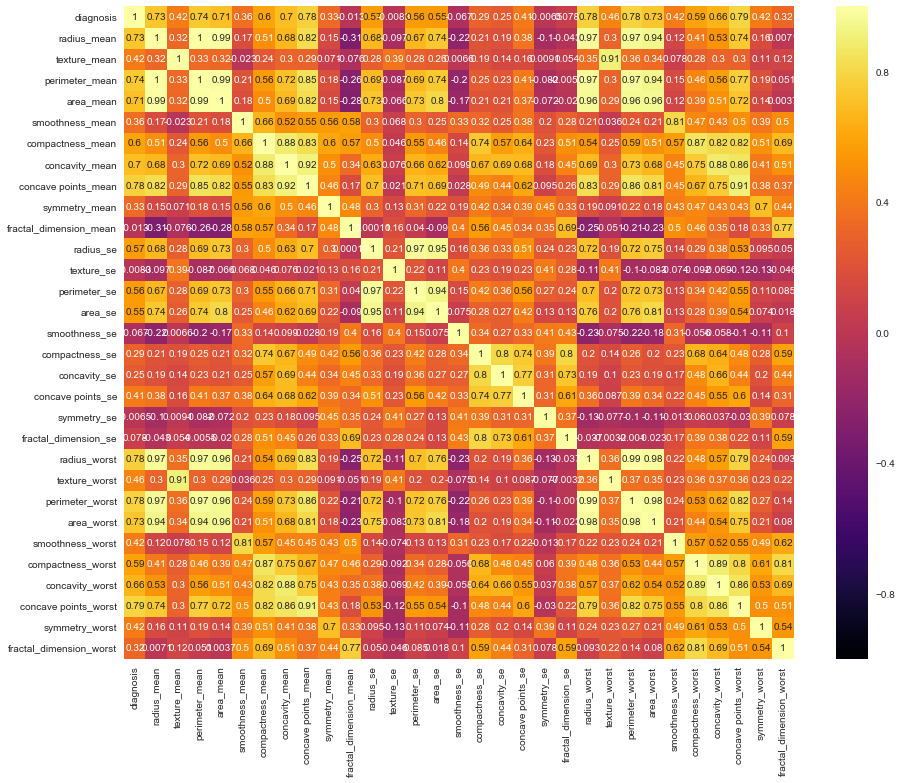

In [21]:
corr = data.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, cmap="inferno", annot=True)
# plt.plot([1, 2])

In [22]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1       17.990         10.38          122.80     1001.0   
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
3            1       11.420         20.38           77.58      386.1   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
9            1       12.460         24.04           83.97      475.9   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
12           1       19.170         24.80          132.40     1123.0   
13           1       15.850         23.95          103.70      782.7   
14           1       13.730         22.61           93.60      578.3   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.68          108.10      798.8   
18           1       19.810         22.15          130.00     1260.0   
19           0       13.540         14.36           87.46      566.3   
20           0       13.080         15.71           85.63      520.0   
21           0        9.504         12.44           60.34      273.9   
22           1       15.340         14.26          102.50      704.4   
23           1       21.160         23.04          137.20     1404.0   
24           1       16.650         21.38          110.00      904.6   
25           1       17.140         16.40          116.00      912.7   
26           1       14.580         21.53           97.41      644.8   
27           1       18.610         20.25          122.10     1094.0   
28           1       15.300         25.27          102.40      732.4   
29           1       17.570         15.05          115.00      955.1   
..         ...          ...           ...             ...        ...   
539          0        7.691         25.44           48.34      170.4   
540          0       11.540         14.44           74.65      402.9   
541          0       14.470         24.99           95.81      656.4   
542          0       14.740         25.42           94.70      668.6   
543          0       13.210         28.06           84.88      538.4   
544          0       13.870         20.70           89.77      584.8   
545          0       13.620         23.23           87.19      573.2   
546          0       10.320         16.35           65.31      324.9   
547          0       10.260         16.58           65.85      320.8   
548          0        9.683         19.34           61.05      285.7   
549          0       10.820         24.21           68.89      361.6   
550          0       10.860         21.48           68.51      360.5   
551          0       11.130         22.44           71.49      378.4   
552          0       12.770         29.43           81.35      507.9   
553          0        9.333         21.94           59.01      264.0   
554          0       12.880         28.92           82.50      514.3   
555          0       10.290         27.61           65.67      321.4   
556          0       10.160         19.59           64.73      311.7   
557          0        9.423         27.88           59.26      271.3   
558          0       14.590         22.68           96.39      657.1   
559          0       11.510         23.93           74.52      403.5   
560          0       14.050         27.15           91.38      600.4   
561          0       11.200         29.37           70.67      386.0   
562          1       15.220         30.62    

#### As seen above, the values in different columns range are not of equal scale

In [23]:
# Normalize features to tranfer to the same scale for uniform influence in weights
normalized_data = (data-np.min(data))/(np.max(data)-np.min(data)).values
normalized_data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0     0.521037      0.022658        0.545989   0.363733   
1          1.0     0.643144      0.272574        0.615783   0.501591   
2          1.0     0.601496      0.390260        0.595743   0.449417   
3          1.0     0.210090      0.360839        0.233501   0.102906   
4          1.0     0.629893      0.156578        0.630986   0.489290   
5          1.0     0.258839      0.202570        0.267984   0.141506   
6          1.0     0.533343      0.347311        0.523875   0.380276   
7          1.0     0.318472      0.376057        0.320710   0.184263   
8          1.0     0.284869      0.409537        0.302052   0.159618   
9          1.0     0.259312      0.484613        0.277659   0.140997   
10         1.0     0.427801      0.457558        0.407090   0.277540   
11         1.0     0.416442      0.276632        0.413309   0.270414   
12         1.0     0.576885      0.510315        0.612328   0.415483   
13         1.0     0.419755      0.481569        0.414000   0.271135   
14         1.0     0.319419      0.436253        0.344206   0.184433   
15         1.0     0.357755      0.602976        0.365835   0.218579   
16         1.0     0.364381      0.352384        0.352083   0.229480   
17         1.0     0.433007      0.370984        0.444406   0.277964   
18         1.0     0.607175      0.420697        0.595743   0.473595   
19         0.0     0.310426      0.157254        0.301776   0.179343   
20         0.0     0.288655      0.202908        0.289130   0.159703   
21         0.0     0.119409      0.092323        0.114367   0.055313   
22         1.0     0.395617      0.153872        0.405708   0.237922   
23         1.0     0.671068      0.450795        0.645498   0.534677   
24         1.0     0.457617      0.394657        0.457536   0.322842   
25         1.0     0.480808      0.226243        0.498998   0.326278   
26         1.0     0.359648      0.399729        0.370534   0.212641   
27         1.0     0.550381      0.356442        0.541151   0.403181   
28         1.0     0.393724      0.526209        0.405017   0.249799   
29         1.0     0.501160      0.180588        0.492088   0.344263   
..         ...          ...           ...             ...        ...   
539        0.0     0.033603      0.531958        0.031442   0.011410   
540        0.0     0.215770      0.159959        0.213254   0.110032   
541        0.0     0.354442      0.516740        0.359478   0.217561   
542        0.0     0.367220      0.531282        0.351807   0.222736   
543        0.0     0.294808      0.620561        0.283947   0.167508   
544        0.0     0.326045      0.371660        0.317739   0.187190   
545        0.0     0.314213      0.457220        0.299910   0.182269   
546        0.0     0.158029      0.224552        0.148711   0.076946   
547        0.0     0.155190      0.232330        0.152443   0.075207   
548        0.0     0.127881      0.325668        0.119273   0.060318   
549        0.0     0.181693      0.490362        0.173450   0.092513   
550        0.0     0.183587      0.398039        0.170824   0.092047   
551        0.0     0.196365      0.430504        0.191417   0.099639   
552        0.0     0.273984      0.666892        0.259554   0.154571   
553        0.0     0.111316      0.413595        0.105176   0.051113   
554        0.0     0.279190      0.649645        0.267501   0.157285   
555        0.0     0.156609      0.605343        0.151199   0.075461   
556        0.0     0.150457      0.334122        0.144703   0.071347   
557        0.0     0.115576      0.614474        0.106903   0.054210   
558        0.0     0.360121      0.438620        0.363486   0.217858   
559        0.0     0.214350      0.480893        0.212356   0.110286   
560        0.0     0.334564      0.589787        0.328865   0.193807   
561        0.0     0.199678      0.664863        0.185751   0.102863   
562        1.0     0.389938      0.707136    

#### After normalization, I'll predict the diagnosis of digitized image of a fine needle aspirate of a breast mass as either Normal or Abnormal